In [29]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Load the real and fake news datasets
df_real = pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv")
df_fake = pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv")
# df_real.shape
# df_fake.shape

In [31]:
# Add a column to differentiate real and fake news
df_real['label'] = 'True'
df_fake['label'] = 'Fake'

# Combine the datasets
df = pd.concat([df_real, df_fake], ignore_index=True)

df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


# Data Cleaning and Preprocessing

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [33]:
df = df.drop(['text', 'subject', 'date'], axis=1)  #ISOT
# df = df.drop(['id', 'news_url', 'tweet_ids'], axis=1)  #gossipcop

df

,title,label
0,"As U.S. budget fight looms, Republicans flip t...",True
1,U.S. military to accept transgender recruits o...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,True
3,FBI Russia probe helped by Australian diplomat...,True
4,Trump wants Postal Service to charge 'much mor...,True
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Fake
44896,How to Blow $700 Million: Al Jazeera America F...,Fake


In [34]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
df.drop_duplicates(inplace = True)
duplicate_rows = df[df.duplicated()]
duplicate_rows

,title,label


In [35]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

title    0
label    0
dtype: int64

In [36]:
# removing duplicates

df.drop_duplicates(inplace = True)

# Remove the duplicate rows
df = df.drop_duplicates()

df['title'] = df['title'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["title"] = df['title'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["title_new"] = df["title"].apply(tokenizer.tokenize)
df["title_new"] = df["title_new"].apply(convert_list_to_str)


df

{"shan't", 'until', 'each', 'shan', 'has', 'through', 'just', "doesn't", 'yours', "that'll", "didn't", 'themselves', 'by', 'i', 'won', "hasn't", 'll', 'no', 'can', "it's", 'she', 'after', 'below', 'm', 'off', 'under', "you've", 'did', 'theirs', 'or', 'they', 'don', "wouldn't", 'been', 'mustn', 'its', 'any', 'again', 'few', 'who', 'than', 'above', 'but', 'ma', 'itself', 'does', 've', 'doesn', 'over', "haven't", 'once', 'whom', "don't", 'yourselves', 'some', 'at', 'further', 'what', 'are', "should've", 'that', 'a', 'so', 'down', 'mightn', 'couldn', 'wasn', 'why', 'having', 'yourself', 'this', "shouldn't", 'o', 'their', 'of', 'himself', 'have', 'with', 'nor', 'into', 'doing', 'he', 'and', 'is', 'then', 'myself', 'while', "mightn't", 'between', 'because', 'be', 'most', 'here', 'will', 'him', 'in', "couldn't", 's', 'ain', 'them', 'y', 'wouldn', 'do', 'how', 'if', "mustn't", 'hers', 'am', 'needn', 'herself', 'had', 'other', 'very', "wasn't", 'd', "needn't", 'where', "you'd", 'my', 'both', "w

,title,label,title_new
0,"u.s. budget fight looms, republicans flip fisc...",True,u s budget fight looms republicans flip fiscal...
1,u.s. military accept transgender recruits mond...,True,u s military accept transgender recruits monda...
2,senior u.s. republican senator: 'let mr. muell...,True,senior u s republican senator let mr mueller job
3,fbi russia probe helped australian diplomat ti...,True,fbi russia probe helped australian diplomat ti...
4,trump wants postal service charge 'much more' ...,True,trump wants postal service charge much more am...
...,...,...,...
44115,white house theatrics ‘gun control’,Fake,white house theatrics gun control
44116,activists terrorists? media controls dictates ...,Fake,activists terrorists media controls dictates t...
44117,"boiler room – surrender, retreat, heads roll –...",Fake,boiler room surrender retreat heads roll ep 38
44118,federal showdown looms oregon blm abuse local ...,Fake,federal showdown looms oregon blm abuse local ...


In [37]:
# import nltk
# print(nltk.data.path)


In [38]:
import nltk

# Set a custom data path
nltk.data.path.append('/kaggle/working/nltk_data')

# Download NLTK resources
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='/kaggle/working/nltk_data')


import zipfile
import os

# Define paths
download_dir = '/kaggle/working/nltk_data'
wordnet_zip_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'
wordnet_extract_dir = os.path.join(download_dir, 'corpora', 'wordnet')

# Ensure the extraction directory exists
os.makedirs(wordnet_extract_dir, exist_ok=True)

# Extract the wordnet.zip file directly into the wordnet directory
with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
    # Extract all contents directly into the wordnet directory
    for file in zip_ref.namelist():
        # Determine the path to extract to
        extract_path = os.path.join(wordnet_extract_dir, file)
        # Check if it's a directory
        if file.endswith('/'):
            os.makedirs(extract_path, exist_ok=True)
        else:
            # Extract individual files
            with zip_ref.open(file) as source, open(extract_path, 'wb') as target:
                target.write(source.read())

# Verify the extracted files
for root, dirs, files in os.walk(wordnet_extract_dir):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))


import shutil
import os

# Define the paths
download_dir = '/kaggle/working/nltk_data'
wordnet_extract_dir = os.path.join(download_dir, 'corpora', 'wordnet')
nested_wordnet_dir = os.path.join(wordnet_extract_dir, 'wordnet')

# Ensure the directories exist
if os.path.exists(nested_wordnet_dir):
    # Move files and directories from nested_wordnet_dir to wordnet_extract_dir
    for item in os.listdir(nested_wordnet_dir):
        s = os.path.join(nested_wordnet_dir, item)
        d = os.path.join(wordnet_extract_dir, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, dirs_exist_ok=True)  # Python 3.8+ required for dirs_exist_ok
        else:
            shutil.copy2(s, d)
    
    # Remove the now-empty nested 'wordnet' directory
    shutil.rmtree(nested_wordnet_dir)

# Verify the final structure
for root, dirs, files in os.walk(wordnet_extract_dir):
    print(f'Root: {root}')
    for name in files:
        print(f'File: {os.path.join(root, name)}')
    for name in dirs:
        print(f'Dir: {os.path.join(root, name)}')


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/kaggle/working/nltk_data/corpora/wordnet/wordnet
/kaggle/working/nltk_data/corpora/wordnet/wordnet/cntlist.rev
/kaggle/working/nltk_data/corpora/wordnet/wordnet/index.adv
/kaggle/working/nltk_data/corpora/wordnet/wordnet/noun.exc
/kaggle/working/nltk_data/corpora/wordnet/wordnet/index.adj
/kaggle/working/nltk_data/corpora/wordnet/wordnet/index.noun
/kaggle/working/nltk_data/corpora/wordnet/wordnet/verb.exc
/kaggle/working/nltk_data/corpora/wordnet/wordnet/data.adv
/kaggle/working/nltk_data/corpora/wordnet/wordnet/data.adj
/kaggle/working/nltk_data/corpora/wordnet/wordnet/data.verb
/kaggle/working/nltk_data/corpora/wordnet/wordnet/adv.exc
/kaggle/working/nltk_data/corpora/wordnet/wordnet/lexnames
/kaggle/working/nltk_data/corpora/w

In [39]:

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["title_new"] = df["title_new"].apply(lemmatize_sentence)
print(df)

df["title"] = df["title_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["title_new"])
# print(df)

#fill 0 in mum
df['title'] = df['title'].fillna("")




                                                   title label  \
0      u.s. budget fight looms, republicans flip fisc...  True   
1      u.s. military accept transgender recruits mond...  True   
2      senior u.s. republican senator: 'let mr. muell...  True   
3      fbi russia probe helped australian diplomat ti...  True   
4      trump wants postal service charge 'much more' ...  True   
...                                                  ...   ...   
44115                white house theatrics ‘gun control’  Fake   
44116  activists terrorists? media controls dictates ...  Fake   
44117  boiler room – surrender, retreat, heads roll –...  Fake   
44118  federal showdown looms oregon blm abuse local ...  Fake   
44119  troubled king: chicago’s rahm emanuel desperat...  Fake   

                                               title_new  
0      u s budget fight loom republican flip fiscal s...  
1      u s military accept transgender recruit monday...  
2       senior u s republican 

In [40]:
#check for duplicates
df.duplicated().sum()

15

In [41]:
#check null
df['title'].isnull().sum()

0

# Exploratory data analysis (EDA)

In [42]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,unique,top,freq
title,38729,38714,late theresa brexit offer eu citizens leave ma...,2
label,38729,2,True,20826


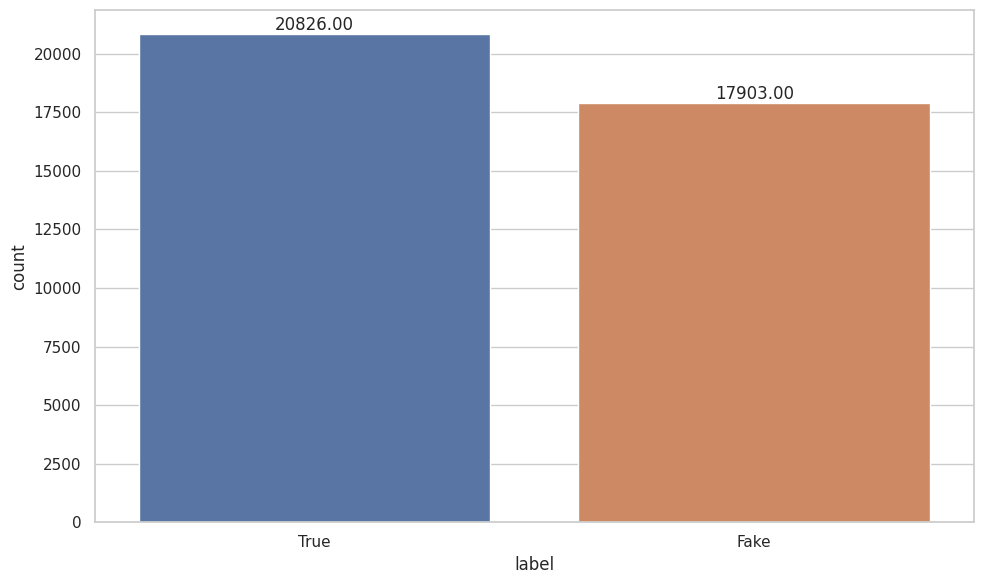

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()
# df

In [44]:


df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['label']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy




,title,label
0,u s budget fight loom republican flip fiscal s...,1.0
1,u s military accept transgender recruit monday...,1.0
2,senior u s republican senator let mr mueller job,1.0
3,fbi russia probe help australian diplomat tip ...,1.0
4,trump want postal service charge much more ama...,1.0
...,...,...
44115,white house theatrics gun control,0.0
44116,activist terrorist medium control dictate the ...,0.0
44117,boiler room surrender retreat head roll ep 38,0.0
44118,federal showdown loom oregon blm abuse local r...,0.0


In [45]:
print(df['label'].nunique())

2


# BERT-BILSTM IMPLEMENTATION

In [46]:
!pip install transformers

In [47]:
from transformers import BertTokenizer

def data_process(data, labels):
    input_ids = []
    attention_masks = []
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    for sentence in data:
        bert_inp = bert_tokenizer.__call__(sentence, max_length=36,
                                           padding='max_length', pad_to_max_length=True,
                                           truncation=True, return_token_type_ids=False)

        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(labels)
    return input_ids, attention_masks, labels



In [48]:
# return input_ids, attention_masks, labels
input_ids, attention_masks, labels = data_process(df_copy["title"], df_copy["label"])


input_ids.shape

(38729, 36)

In [49]:
dataset = pd.DataFrame({'input_ids': list(input_ids), 'attention_masks': list(attention_masks)}, columns=['input_ids', 'attention_masks'])
dataset

,input_ids,attention_masks
0,"[101, 1057, 1055, 5166, 2954, 8840, 5358, 3951...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
1,"[101, 1057, 1055, 2510, 5138, 16824, 13024, 69...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
2,"[101, 3026, 1057, 1055, 3951, 5205, 2292, 2720...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
3,"[101, 8495, 3607, 15113, 2393, 2827, 11125, 59...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
4,"[101, 8398, 2215, 10690, 2326, 3715, 2172, 206...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
...,...,...
38724,"[101, 2317, 2160, 1996, 4017, 7277, 2015, 3282...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
38725,"[101, 7423, 9452, 5396, 2491, 4487, 25572, 261...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
38726,"[101, 15635, 2282, 7806, 7822, 2132, 4897, 495...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
38727,"[101, 2976, 24419, 8840, 5358, 5392, 1038, 137...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [50]:
labels = labels.astype(np.int64)
labels

array([1, 1, 1, ..., 0, 0, 0])

# BERT BILSTM Model Defination

In [51]:
import gc

import torch
from torch import nn
from transformers import BertModel

class BERT_LSTM(nn.Module):

    def __init__(self, num_classes, hidden_size, num_layers, bidirectional):
        super(BERT_LSTM, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        for param in self.bert.parameters():
            param.requires_grad = False

        # Unfreeze the last two layers of BERT
        for param in self.bert.encoder.layer[-2:].parameters():
            param.requires_grad = True

        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0]
        x = self.dropout(x)
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])
        return self.softmax(x)

In [52]:
import gc
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd

train_text, temp_text, train_labels, temp_labels = train_test_split(dataset, labels,
                             random_state=2018, test_size=0.2, stratify=labels)

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                         random_state=2018, test_size=0.5, stratify=temp_labels)


del temp_text
gc.collect()
torch.cuda.empty_cache()

train_count = len(train_labels)
test_count = len(test_labels)
val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for train set
train_seq = torch.tensor(train_text['input_ids'].tolist())
train_mask = torch.tensor(train_text['attention_masks'].tolist())
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(val_text['input_ids'].tolist())
val_mask = torch.tensor(val_text['attention_masks'].tolist())
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# Train Sampler
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# Sequence sampler
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# freeze bert parameters
for param in bert.parameters():
    param.requires_grad = False

# pass the pre-trained BERT to our define architecture
model = BERT_LSTM(num_classes=2, hidden_size=128, num_layers=2, bidirectional=True)
# push the model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

#Loss Function
cross_entropy = nn.NLLLoss()

# set initial loss to infinite
best_valid_loss = float('inf')



def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    accuracy = 0
    # iterate over batches
    total = len(train_dataloader)
    acc_list = []

    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={total_accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

cuda


In [53]:
import gc
import torch
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

best_accuracy = 0.0 
best_model_state = None  

# Define the number of epochs
epochs = 10
current = 1

# Training loop
while current <= epochs:
    print(f'\nEpoch {current} / {epochs}:')

    # Train model
    train_loss, _, train_acc = train()

    # Evaluate model
    valid_loss, _, valid_acc = evaluate()

    # Check if the current epoch's accuracy is the best so far
    if valid_acc > best_accuracy:
        best_accuracy = valid_acc
        best_model_state = model.state_dict()

    print(f'\n\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')
    print(f'\n\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')

    current = current + 1

# Save the model with the best accuracy
if best_model_state is not None:
    torch.save(best_model_state, 'best_model_isot.pth')

# Get predictions for test data
gc.collect()
torch.cuda.empty_cache()

# Load the best model for evaluation
if best_model_state is not None:
    model.load_state_dict(best_model_state)



Epoch 1 / 10:
Batch 969/969 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.01, accuracy=0.8755

Evaluating...
Batch 122/122 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.01, accuracy=0

Training Loss: 0.008
Validation Loss: 0.006


Training Accuracy: 0.891
Validation Accuracy: 0.931

Epoch 2 / 10:
Batch 969/969 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.01, accuracy=0.96875

Evaluating...
Batch 122/122 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0

Training Loss: 0.005
Validation Loss: 0.005


Training Accuracy: 0.934
Validation Accuracy: 0.937

Epoch 3 / 10:
Batch 969/969 |█████████████████████████████████████████████████████████████████████████

In [54]:
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

print("Performance:")
# Model's performance
preds = np.argmax(preds, axis=1)
print('Classification Report')
print(classification_report(test_y, preds))

print("Accuracy: " + str(accuracy_score(test_y, preds)))

Performance:
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1791
           1       0.95      0.97      0.96      2082

    accuracy                           0.96      3873
   macro avg       0.96      0.96      0.96      3873
weighted avg       0.96      0.96      0.96      3873

Accuracy: 0.9566227730441518


Confusion Matrix:
[[1691  100]
 [  68 2014]]


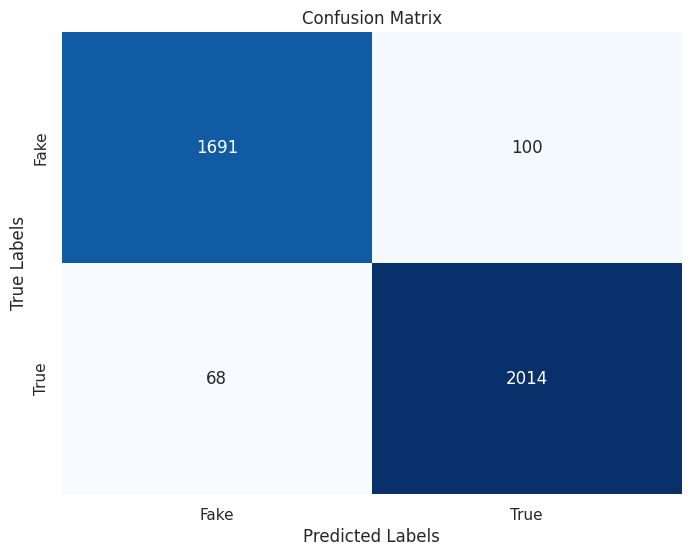

In [55]:
# Compute and print the confusion matrix

print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_y, preds)
print(conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Confusion Matrix:
[[1691  100]
 [  68 2014]]


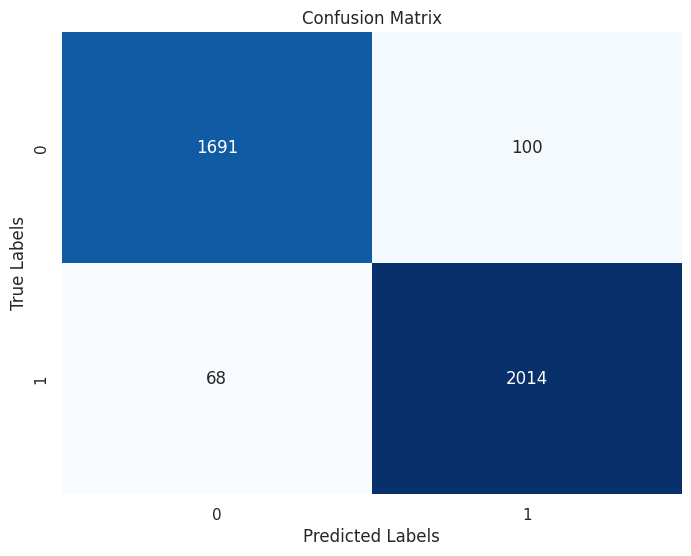

In [56]:
# Compute and print the confusion matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_y, preds)
print(conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
#             xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [57]:

from torch import nn
from transformers import BertModel

class BERT_LSTM(nn.Module):

    def __init__(self, num_classes, hidden_size, num_layers, bidirectional):
        super(BERT_LSTM, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        for param in self.bert.parameters():
            param.requires_grad = False

        # Unfreeze the last two layers of BERT
        for param in self.bert.encoder.layer[-2:].parameters():
            param.requires_grad = True

        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0]
        x = self.dropout(x)
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])
        return self.softmax(x)
    
model = BERT_LSTM(num_classes=2, hidden_size=128, num_layers=2, bidirectional=True)
model_path="/kaggle/input/m_isot/pytorch/default/1/best_model_ISOT.pth"
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))  # Use 'cpu' if you're on a CPU-only machine

# Set the model to evaluation mode
model.eval()



# Example usage of the model for prediction
def fake_news_detection(prompt):
    # Assuming tokenizer is defined and loaded (for example, from transformers)
    inputs = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True, max_length=512)

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Make predictions
    with torch.no_grad():
        output = model(input_ids, attention_mask)
        print(output)
        preds = output.detach().cpu().numpy()
        
    preds = np.argmax(preds, axis=1)
    print(preds,"HIH")

    
    # Process output to get predicted class
    predicted_class = output.argmax(dim=1).item()
    print(predicted_class)

    return predicted_class

# Test the function
print(fake_news_detection("hoivv"))


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

RuntimeError: Error(s) in loading state_dict for BERT_LSTM:
	size mismatch for fc.weight: copying a param with shape torch.Size([4, 256]) from checkpoint, the shape in current model is torch.Size([2, 256]).
	size mismatch for fc.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([2]).